In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [11]:
# data Loading 
df = pd.read_csv("test_loan_eligibility_cleaned.csv")
df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001528,Male,No,0,Graduate,No,6277,0.0,118.0,360.0,0.000000,Rural
1,LP002804,Male,Yes,0,Graduate,No,4180,2306.0,182.0,360.0,1.000000,Semiurban
2,LP002945,Male,Yes,0,Graduate,Yes,9963,0.0,180.0,360.0,1.000000,Rural
3,LP001784,Male,Yes,1,Graduate,No,5500,1260.0,170.0,360.0,1.000000,Rural
4,LP001514,Male,Yes,0,Graduate,No,2330,4486.0,100.0,360.0,1.000000,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...,...
118,LP002178,Male,Yes,0,Graduate,No,3013,3033.0,95.0,300.0,0.810345,Urban
119,LP001910,Male,No,1,Not Graduate,Yes,4053,2426.0,158.0,360.0,0.000000,Urban
120,LP001014,Male,Yes,3,Graduate,No,3036,2504.0,158.0,360.0,0.000000,Semiurban
121,LP001935,Male,No,0,Graduate,No,9508,0.0,187.0,360.0,1.000000,Rural


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            123 non-null    object 
 1   Gender             123 non-null    object 
 2   Married            123 non-null    object 
 3   Dependents         123 non-null    int64  
 4   Education          123 non-null    object 
 5   Self_Employed      123 non-null    object 
 6   ApplicantIncome    123 non-null    int64  
 7   CoapplicantIncome  123 non-null    float64
 8   LoanAmount         123 non-null    float64
 9   Loan_Amount_Term   123 non-null    float64
 10  Credit_History     123 non-null    float64
 11  Property_Area      123 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 11.7+ KB


In [15]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,0.723577,4898.333333,1827.659512,142.917355,344.826446,0.810345
std,1.042544,4438.739824,3423.180578,79.031182,61.798015,0.382267
min,0.000000,150.000000,0.000000,25.000000,84.000000,0.000000
25%,0.000000,2649.000000,0.000000,101.000000,360.000000,1.000000
50%,0.000000,3620.000000,1483.000000,124.000000,360.000000,1.000000
75%,1.000000,5509.500000,2479.000000,163.000000,360.000000,1.000000
max,3.000000,39147.000000,33837.000000,500.000000,480.000000,1.000000


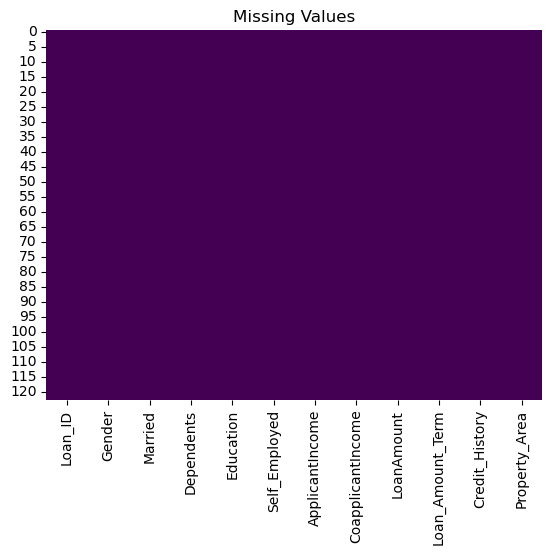

In [19]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values")
plt.show()


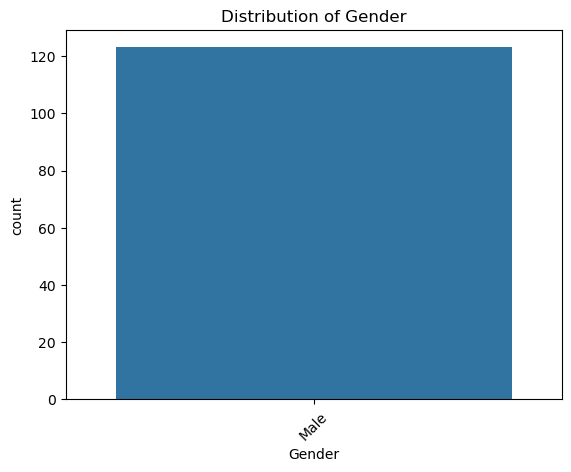

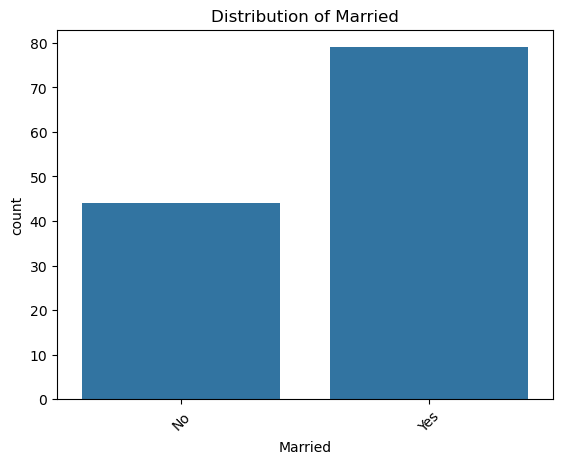

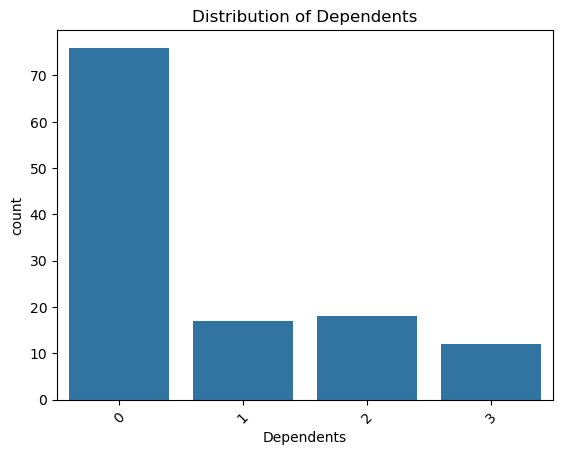

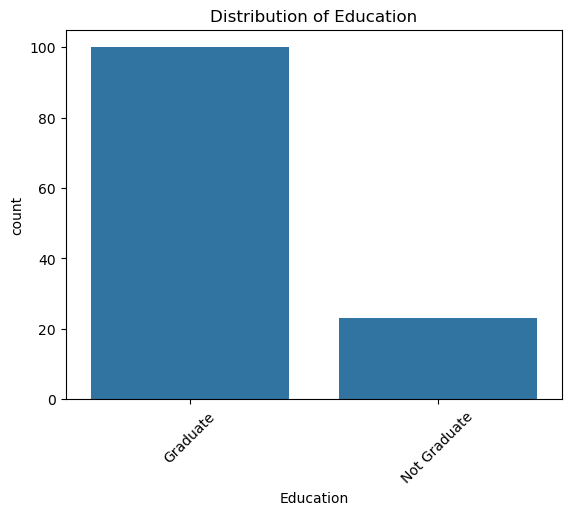

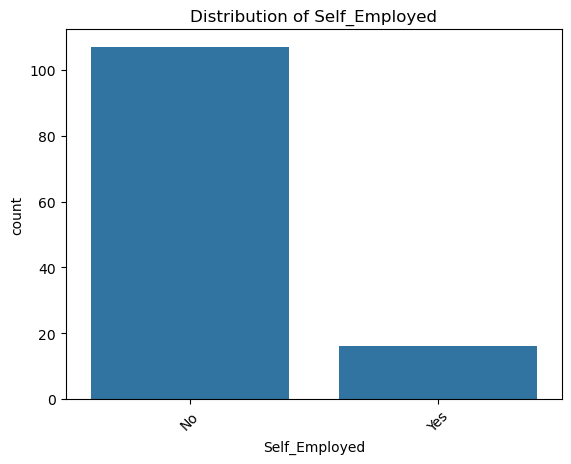

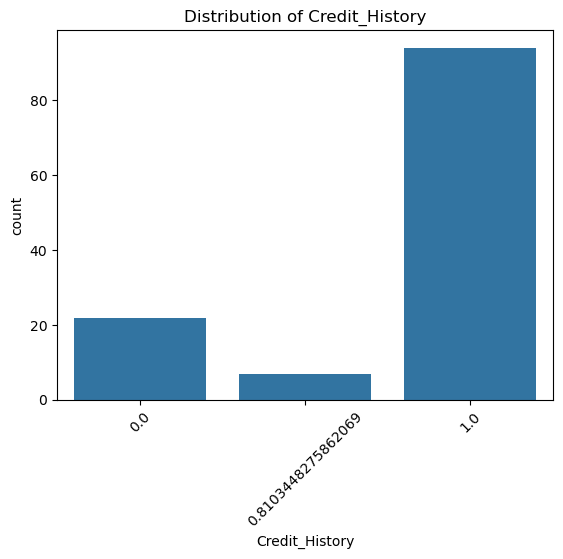

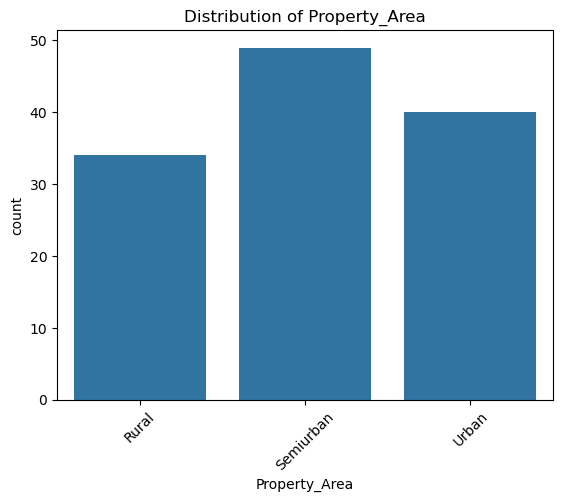

In [30]:
# Data Categorical Features
categorical = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

for col in categorical:
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


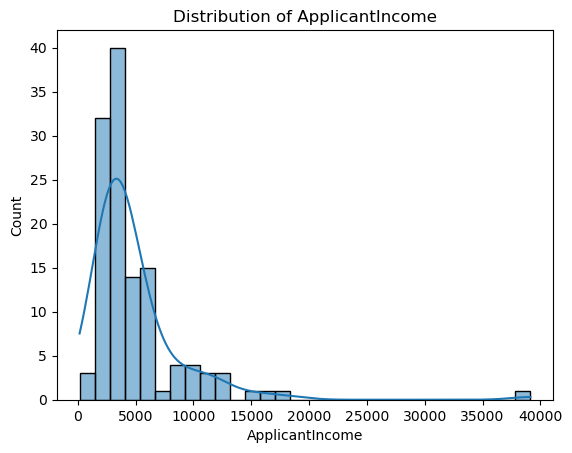

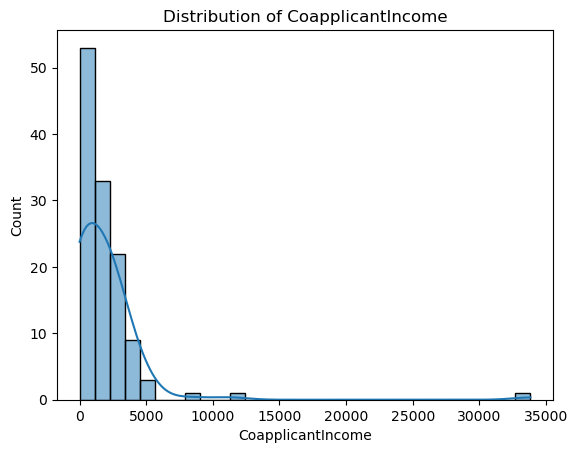

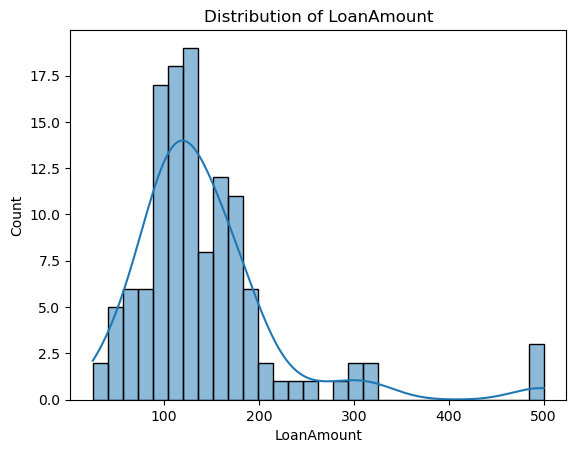

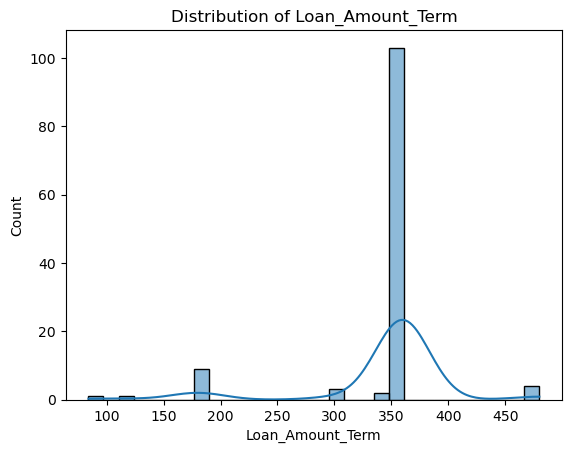

In [25]:
# Numerical Features
numerical = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

for col in numerical:
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


# Bivariate Analysis
## Relation between features and Loan_Status

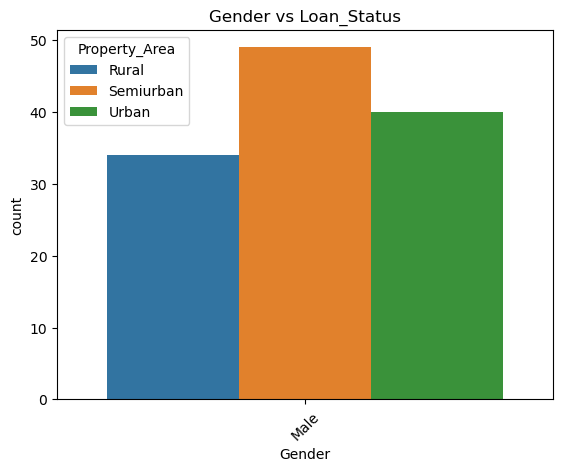

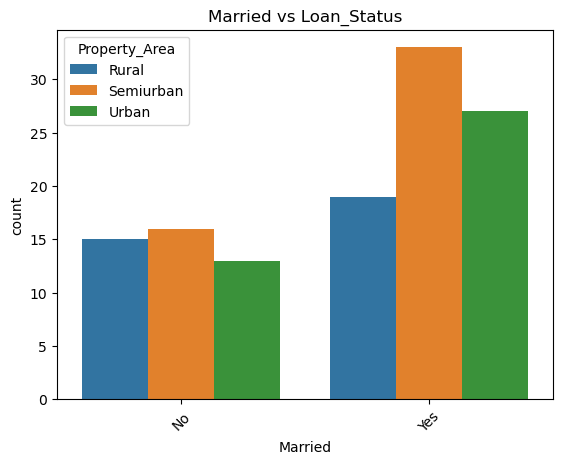

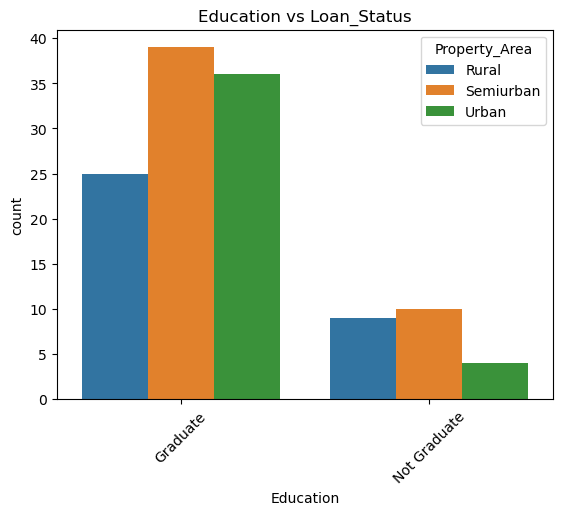

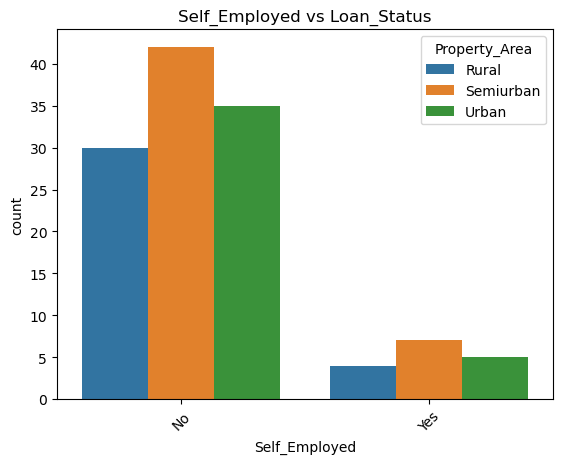

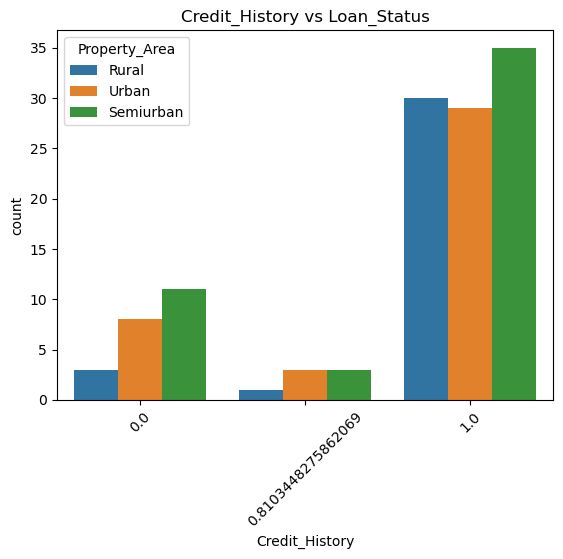

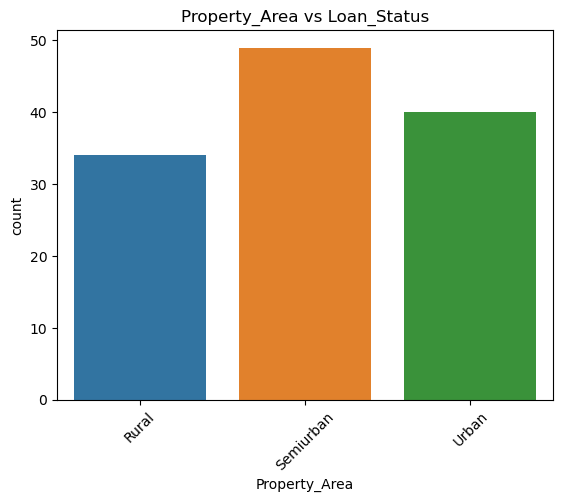

In [32]:
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']:
    sns.countplot(data=df, x=col, hue='Property_Area')
    plt.title(f"{col} vs Loan_Status")
    plt.xticks(rotation=45)
    plt.show()


#  Income vs Loan Amount

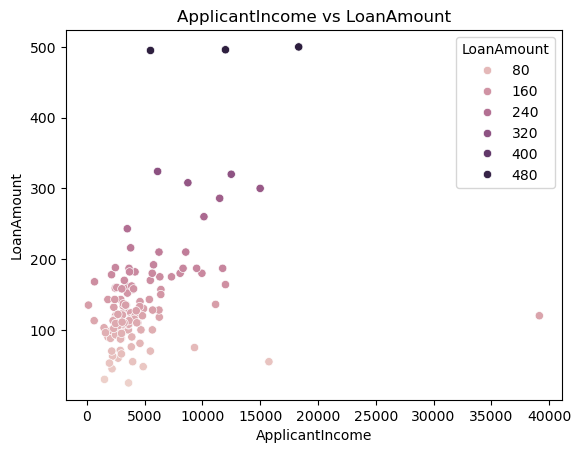

In [39]:
sns.scatterplot(x=df['ApplicantIncome'], y=df['LoanAmount'], hue=df['LoanAmount'])
plt.title("ApplicantIncome vs LoanAmount")
plt.show()


# Credit History Impact

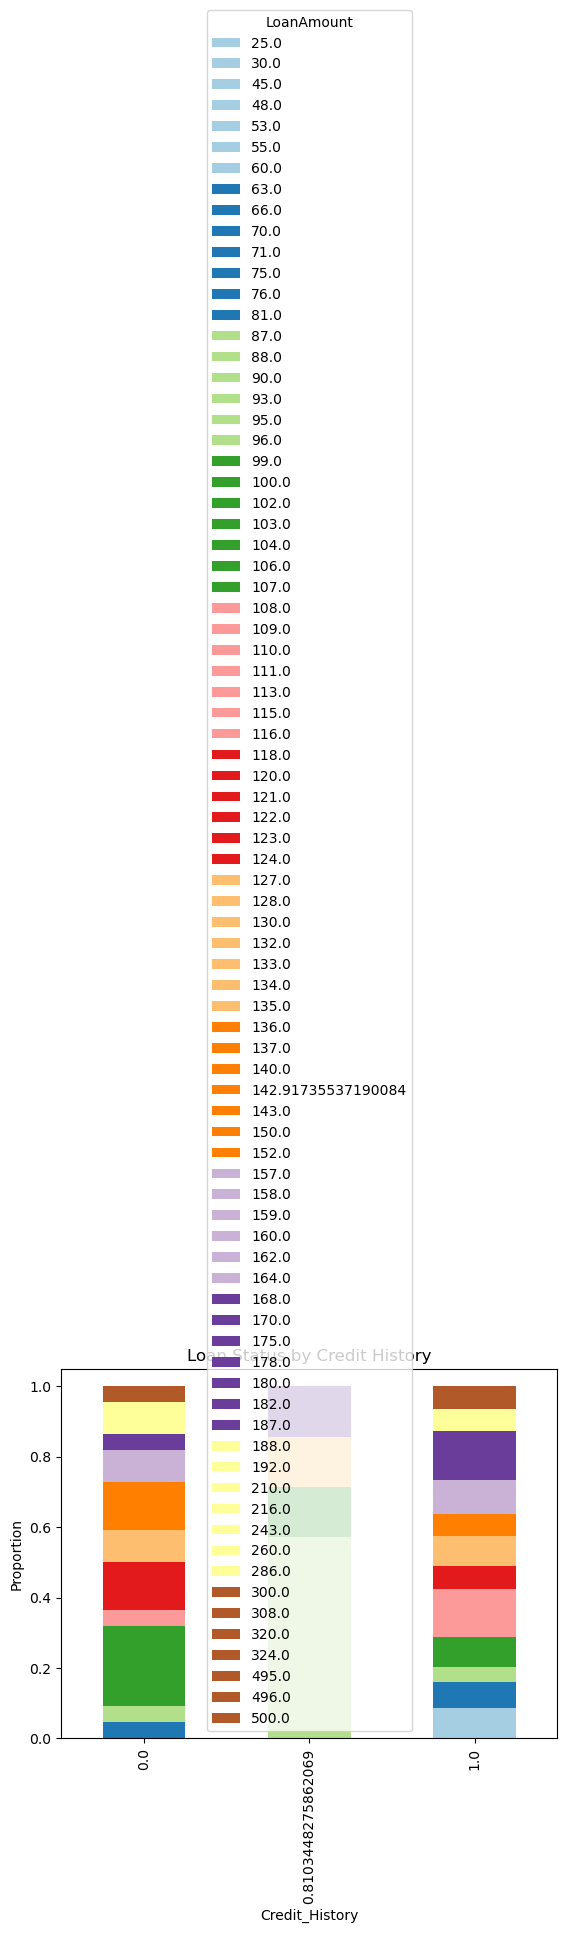

In [42]:
credit_group = df.groupby('Credit_History')['LoanAmount'].value_counts(normalize=True).unstack()
credit_group.plot(kind='bar', stacked=True, colormap='Paired')
plt.title("Loan Status by Credit History")
plt.ylabel("Proportion")
plt.show()


# Correlation Heatmap

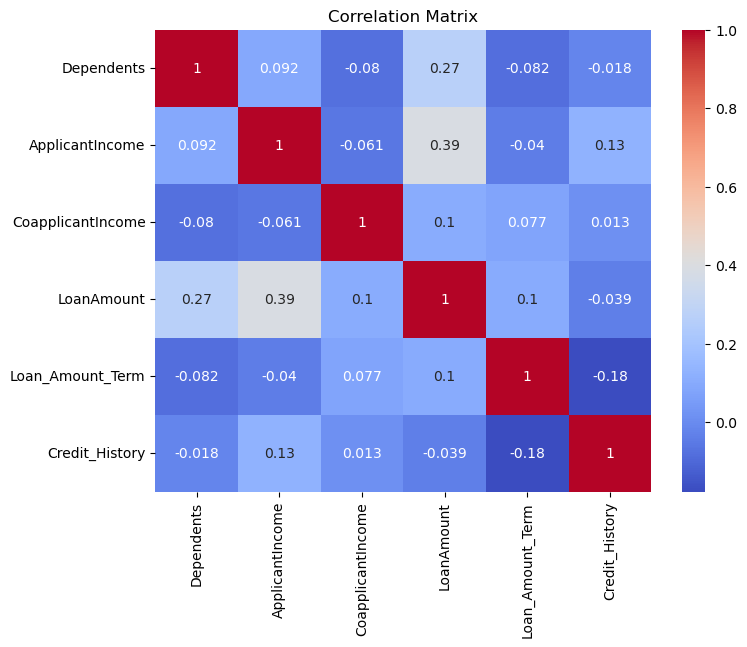

In [45]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [51]:
# data Loading 
data = pd.read_csv("train_loan_eligibility_cleaned.csv")
data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001535,Male,No,0.0,Graduate,No,3254,0.0,50.0,360.0,1.0,Urban,Y
1,LP001792,Male,Yes,1.0,Graduate,No,3315,0.0,96.0,360.0,1.0,Semiurban,Y
2,LP002443,Male,Yes,2.0,Graduate,No,3340,1710.0,150.0,360.0,0.0,Rural,N
3,LP002517,Male,Yes,1.0,Not Graduate,No,2653,1500.0,113.0,180.0,0.0,Rural,N
4,LP001894,Male,Yes,0.0,Graduate,No,2620,2223.0,150.0,360.0,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,LP001744,Male,No,0.0,Graduate,No,2971,2791.0,144.0,360.0,1.0,Semiurban,Y
487,LP002138,Male,Yes,0.0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural,Y
488,LP001068,Male,Yes,0.0,Graduate,No,2799,2253.0,122.0,360.0,1.0,Semiurban,Y
489,LP001327,Female,Yes,0.0,Graduate,No,2484,2302.0,137.0,360.0,1.0,Semiurban,Y


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            491 non-null    object 
 1   Gender             491 non-null    object 
 2   Married            491 non-null    object 
 3   Dependents         491 non-null    float64
 4   Education          491 non-null    object 
 5   Self_Employed      491 non-null    object 
 6   ApplicantIncome    491 non-null    int64  
 7   CoapplicantIncome  491 non-null    float64
 8   LoanAmount         491 non-null    float64
 9   Loan_Amount_Term   491 non-null    float64
 10  Credit_History     491 non-null    float64
 11  Property_Area      491 non-null    object 
 12  Loan_Status        491 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 50.0+ KB


In [55]:
# Check for missing value
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [59]:
# Check for duplicated
data.duplicated().sum()

0

In [61]:
data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.761905,5529.997963,1569.537271,147.309979,341.286013,0.850446
std,0.997567,6457.784318,2789.523475,85.300510,65.043656,0.341007
min,0.000000,210.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2906.000000,0.000000,100.500000,360.000000,1.000000
50%,0.000000,3859.000000,1032.000000,130.000000,360.000000,1.000000
75%,1.000000,5825.000000,2241.000000,165.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


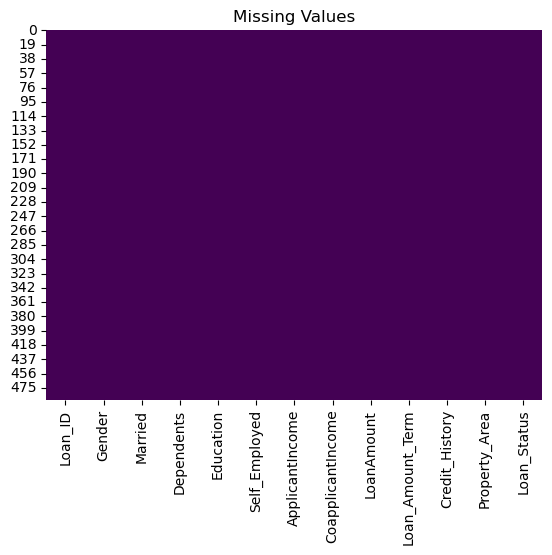

In [63]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values")
plt.show()


# Univariate Analysis
#  Categorical Features

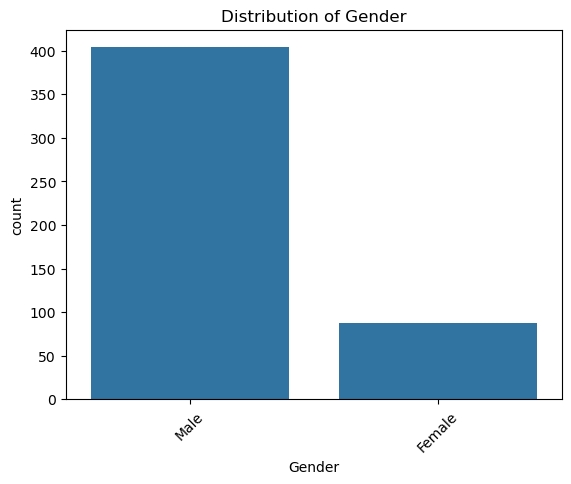

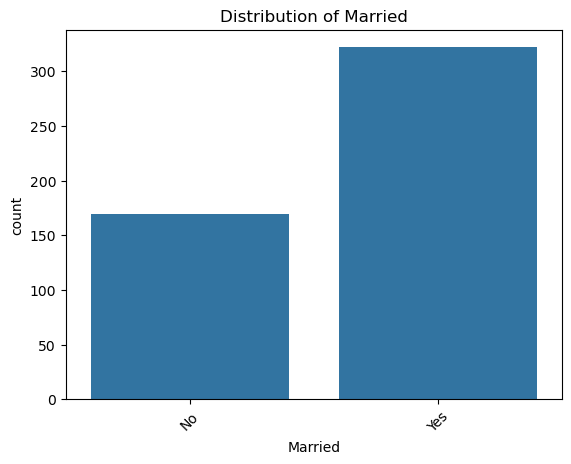

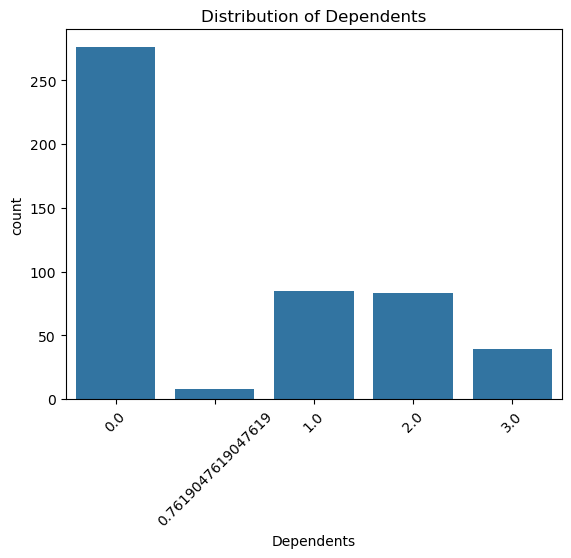

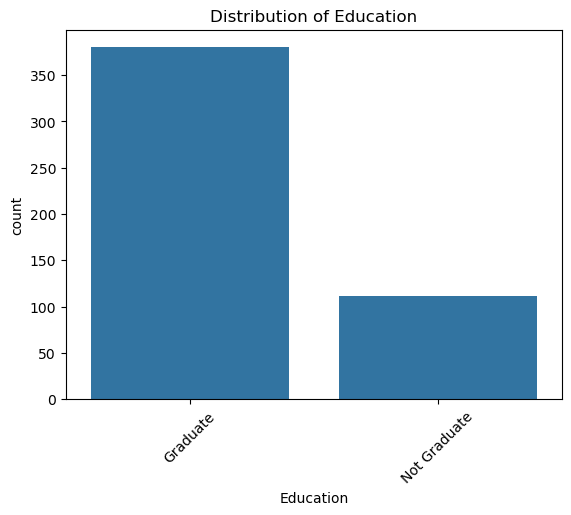

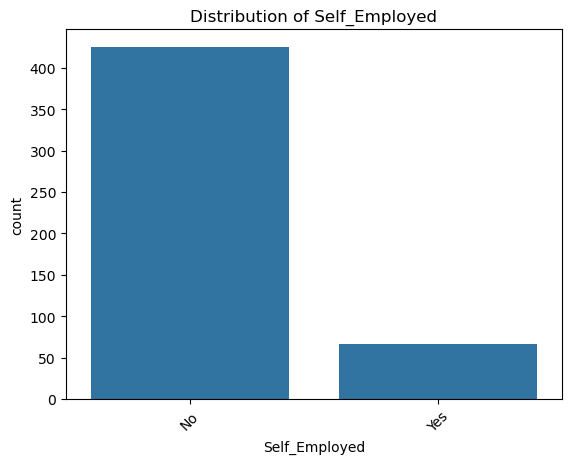

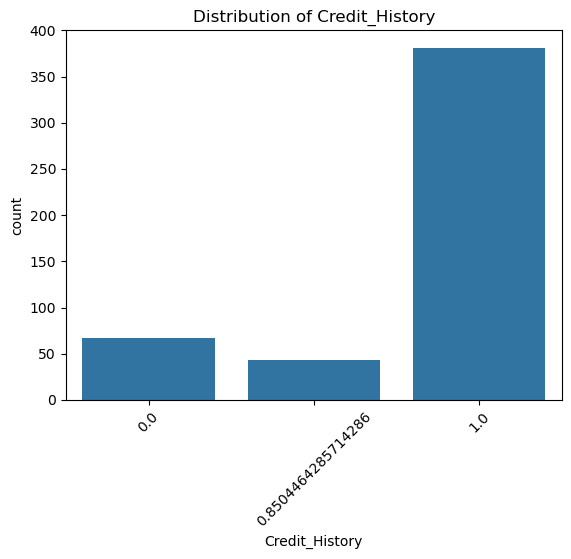

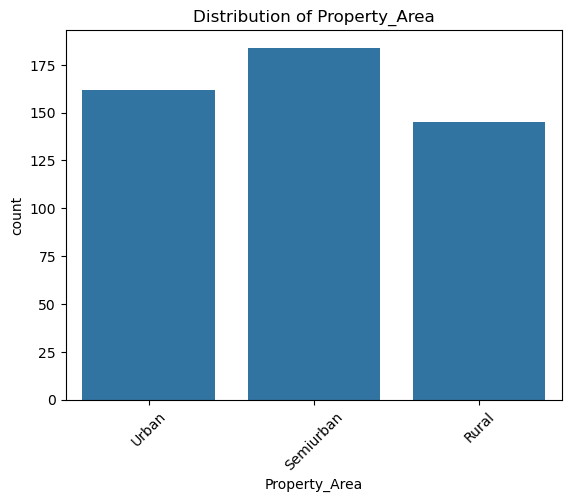

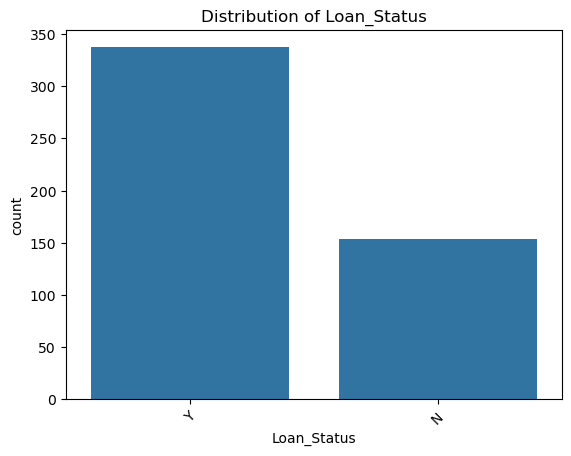

In [68]:
categorical = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

for col in categorical:
    sns.countplot(data=data, x=col)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


# Numerical Features

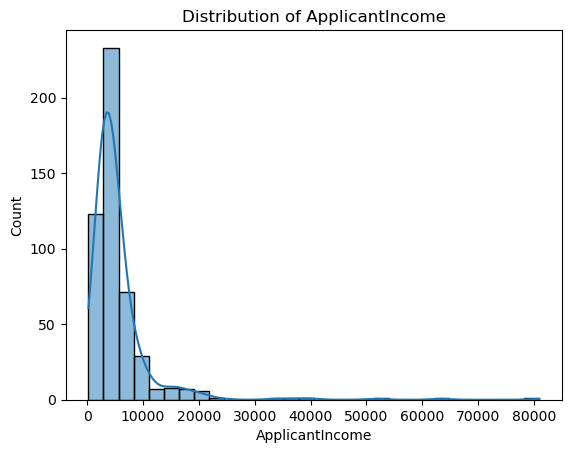

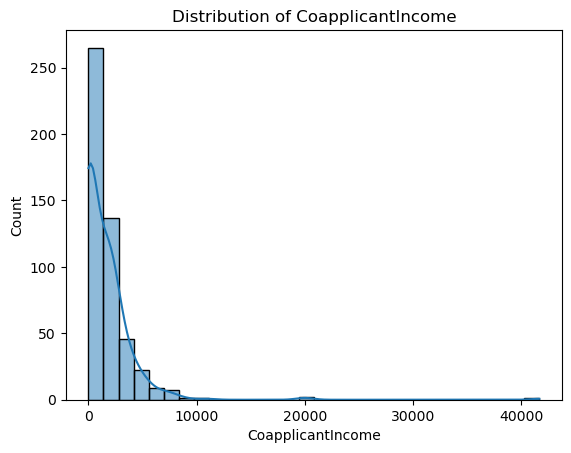

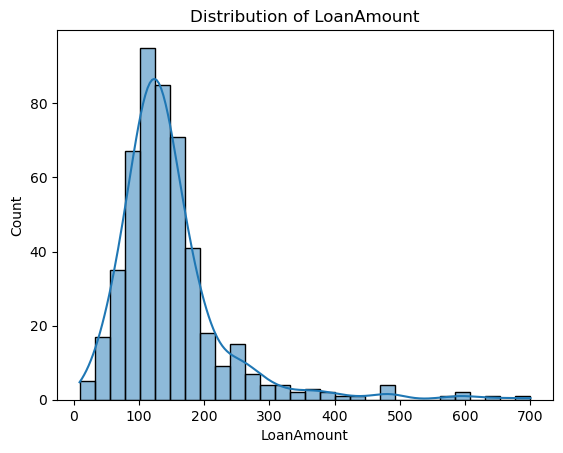

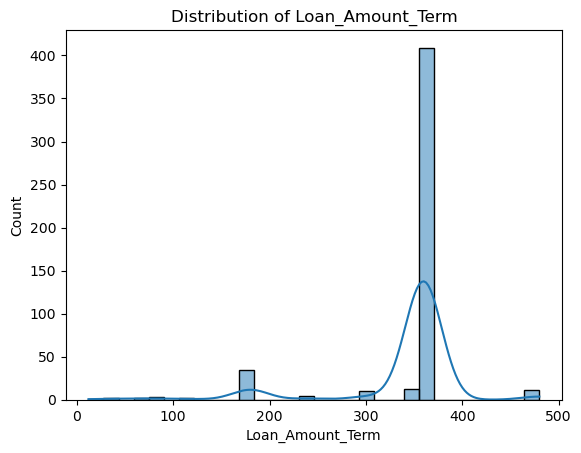

In [71]:
numerical = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

for col in numerical:
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


# Bivariate Analysis

- Relation between features and Loan_Status

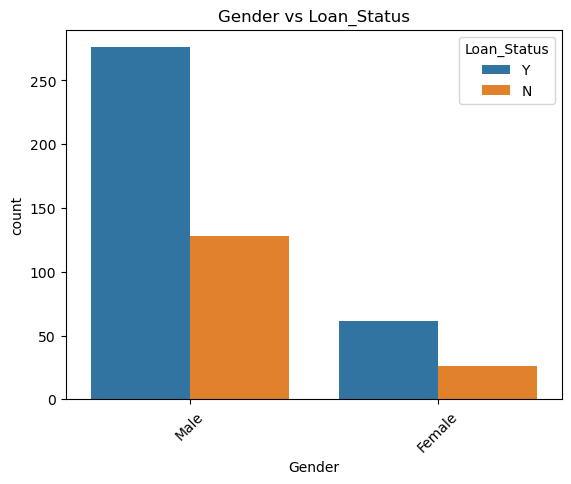

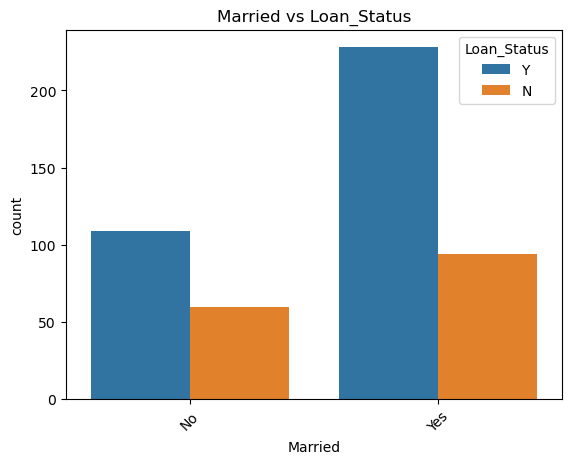

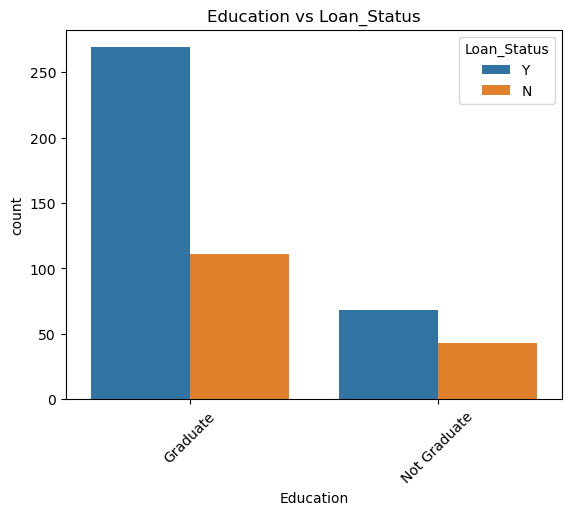

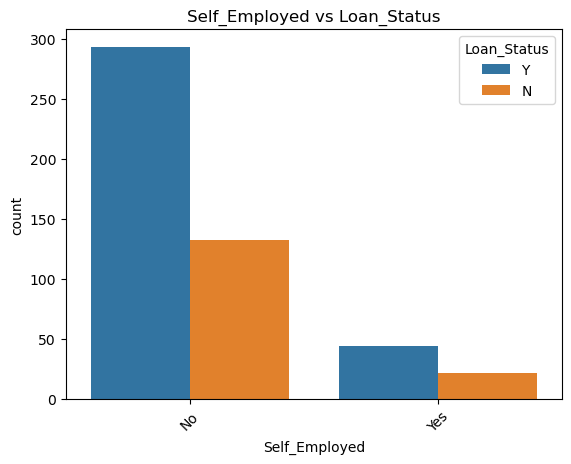

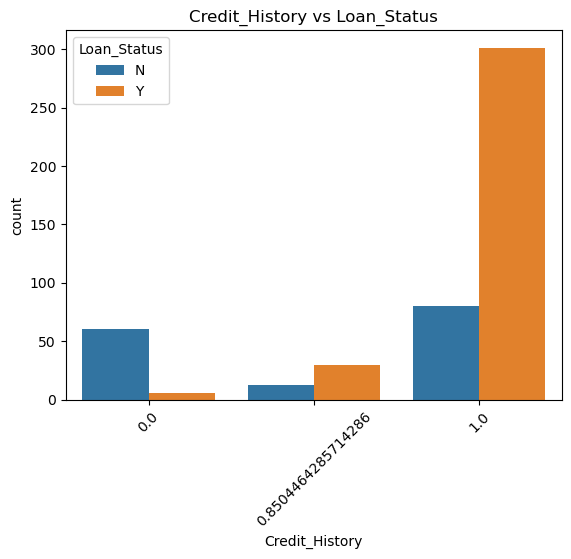

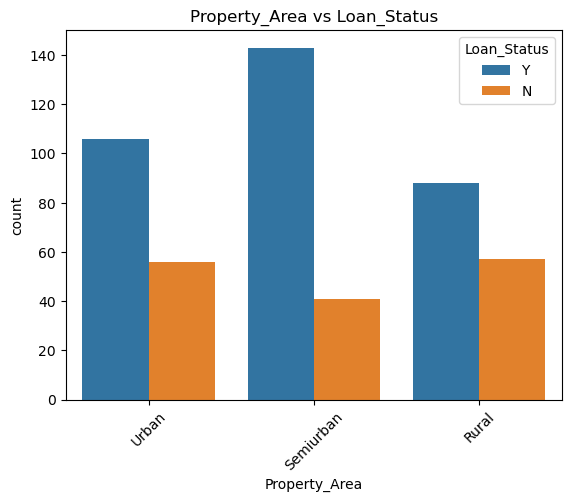

In [74]:
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']:
    sns.countplot(data=data, x=col, hue='Loan_Status')
    plt.title(f"{col} vs Loan_Status")
    plt.xticks(rotation=45)
    plt.show()


#  Income vs Loan Amount

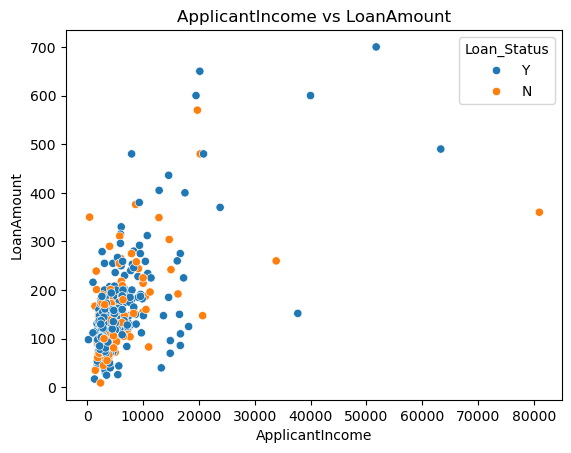

In [77]:
sns.scatterplot(x=data['ApplicantIncome'], y=data['LoanAmount'], hue=data['Loan_Status'])
plt.title("ApplicantIncome vs LoanAmount")
plt.show()


# Credit History Impact

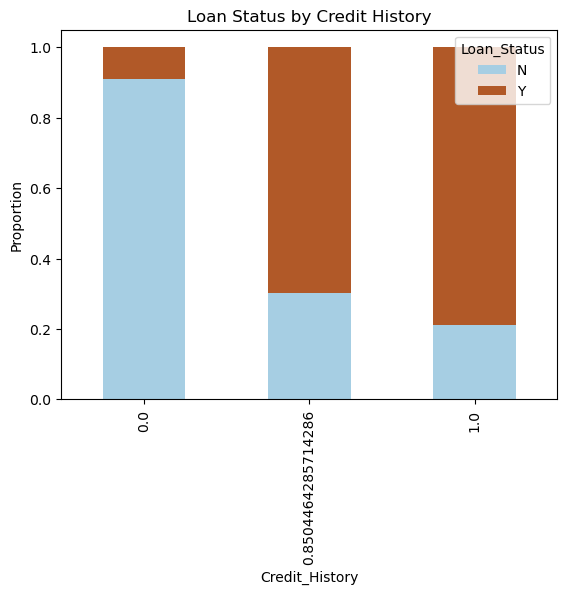

In [82]:
credit_group = data.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True).unstack()
credit_group.plot(kind='bar', stacked=True, colormap='Paired')
plt.title("Loan Status by Credit History")
plt.ylabel("Proportion")
plt.show()


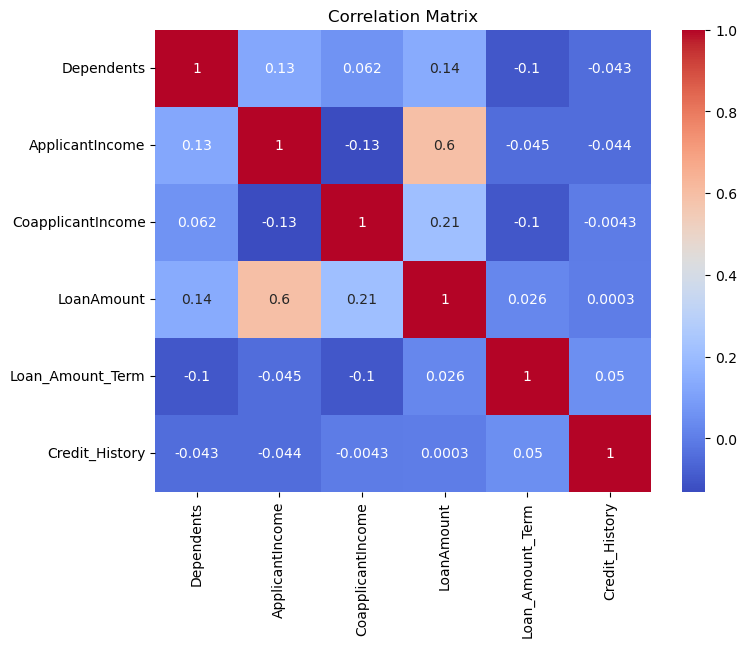

In [84]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
